# Advanced Regression Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.<br>
<br>
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.<br>
<br>
The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Steps:

1. Data understanding
2. Data preparation
3. Visualizing the data
4. Model Building
    4.1 Using Lasso Regression
    4.2 Using Ridge Regression
5. Inferences and recommendations from above Model

In [1]:
# to surpress warnings. 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# to import necessary libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection  import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## 1: Read & Clean the Data

In [3]:
# to read the data. 
housing_df  = pd.read_csv("train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# to check the shape of the data. 
housing_df.shape

(1460, 81)

In [5]:
# to check the numeric statistics of the data. 
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# to check the info of the data. 
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# to check if the data has any duplicates. 
any(housing_df.duplicated())

False

No duplicates in the data. 


In [8]:
# to check the missing value percentage in the data. 
round(100*(housing_df.isnull().sum()/len(housing_df)),2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64

Here are  columns here will more than 80% of missing values in them so the first thing would be to drop such columns. 


In [9]:
# to drop the columns with missing values more than 80% . 
housing_df.drop(columns = ['PoolQC','MiscFeature','Alley','Fence'], inplace = True)
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2).sort_values(ascending = False)

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
                 ...  
CentralAir        0.00
HeatingQC         0.00
SaleCondition     0.00
TotalBsmtSF       0.00
Id                0.00
Length: 77, dtype: float64

As per the data  description if any categorical values have missing values in them, it simply implies that the variable doest have any values. So for such categorical varibales we can impute with values such  as No fire place, no basement etc. 

In [10]:
# replacing the missing values in FireplaceQu with nan. 
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].replace(np.nan, 'No Fireplace')
housing_df['FireplaceQu'].value_counts(dropna = False)

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [11]:
# checking for missing values again. 
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2).sort_values(ascending = False)

LotFrontage     17.74
GarageFinish     5.55
GarageType       5.55
GarageCond       5.55
GarageQual       5.55
                ...  
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
Id               0.00
Length: 77, dtype: float64

In [12]:
# imputing nan values  as No garage for variables like Garage Finish, Garage Type, Garage Cond, Garage Qual.  
missing_garage = ['GarageFinish', 'GarageType', 'GarageCond', 'GarageQual']

for i  in missing_garage:
    housing_df[i] = housing_df[i].replace(np.nan, 'No Garage')
    
for i in missing_garage:
    print(housing_df[i].value_counts(dropna = False))

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64
TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64
TA           1311
No Garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64


Here we can see that most of these variables are highly correlated.


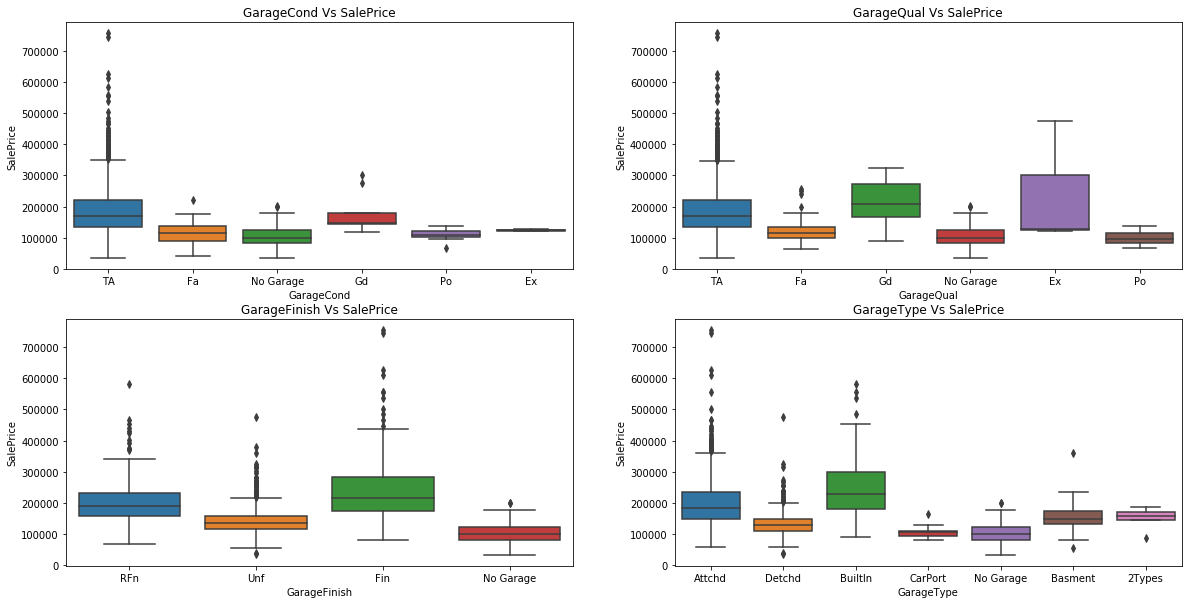

In [13]:
# to plot and check which of the above variables are highly correlated.
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title("GarageCond Vs SalePrice")
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housing_df)

plt.subplot(2,2,2)
plt.title("GarageQual Vs SalePrice")
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housing_df)

plt.subplot(2,2,3)
plt.title("GarageFinish Vs SalePrice")
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing_df)

plt.subplot(2,2,4)
plt.title("GarageType Vs SalePrice")
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing_df)

From the above plot we clearly can see that GarageCond and GarageQual are highly correlated so lets drop them 


In [14]:
# to drop the GarageCond  and GarageQual variables. 
housing_df.drop(['GarageCond', 'GarageQual'], axis = 1, inplace = True)
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2).sort_values(ascending = False)

LotFrontage     17.74
GarageYrBlt      5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
                ...  
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
Id               0.00
Length: 75, dtype: float64

In [15]:
# to impute nan values with No basement for variables like BsmtFinType2, BsmtExposure, BsmtFinType1

missing_basement = ['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']

for i  in missing_basement:
    housing_df[i] = housing_df[i].replace(np.nan, 'No Basement')
    
for i in missing_basement:
    print(housing_df[i].value_counts(dropna = False))

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64
Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64
TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64
TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64


In [16]:
# due to due to skewness of the data, we are dropping the columns BsmtFinType2 and BsmtCond
housing_df.drop(['BsmtFinType2','BsmtCond'],axis=1,inplace=True)

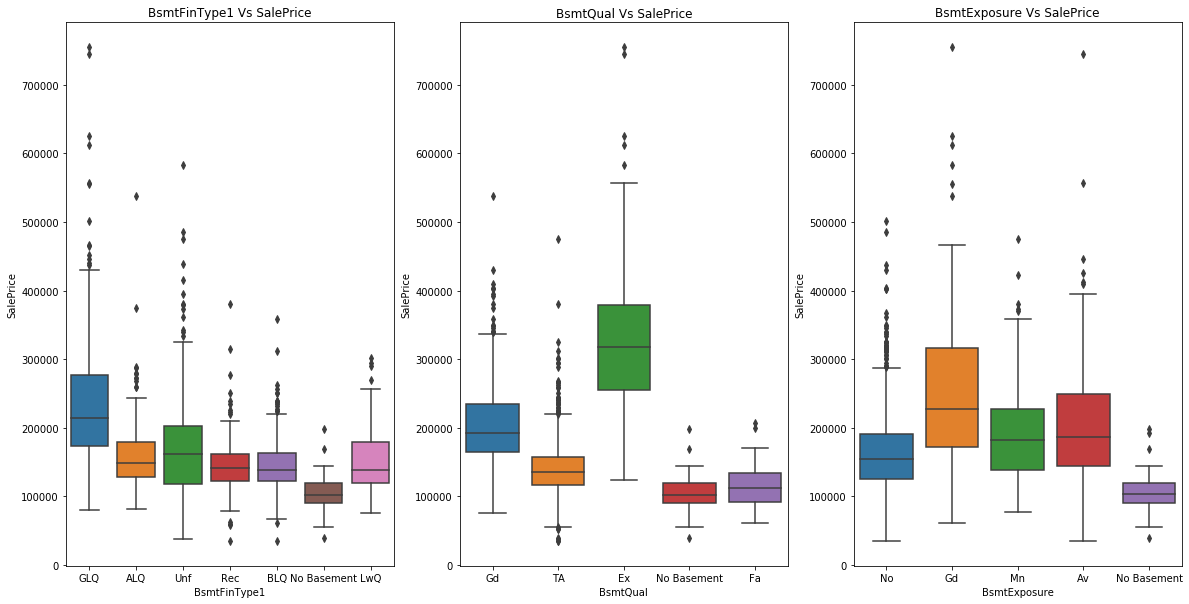

In [17]:
#plotting between the missing basement and target variable(Saleprice)
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.title("BsmtFinType1 Vs SalePrice")
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = housing_df)
plt.subplot(1,3,2)
plt.title("BsmtQual Vs SalePrice")
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housing_df)
plt.subplot(1,3,3)
plt.title("BsmtExposure Vs SalePrice")
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housing_df)

In [18]:
# BsmtFinType1 not having importance in the sale price Hence droping the column
housing_df.drop("BsmtFinType1",axis=1,inplace=True)

In [19]:
#Checking for value Counts for Electrical
housing_df['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [20]:
# Electrical has  more skewness of the data, hence shall drop the data. 
housing_df.drop('Electrical', axis =1, inplace= True)
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2).sort_values(ascending = False)

LotFrontage     17.74
GarageYrBlt      5.55
MasVnrArea       0.55
MasVnrType       0.55
SalePrice        0.00
                ...  
LowQualFinSF     0.00
2ndFlrSF         0.00
1stFlrSF         0.00
CentralAir       0.00
Id               0.00
Length: 71, dtype: float64

In [21]:
# imputing missing values for LotFrontAge( Continous  Variable) with median value as it has some outliers. 
housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median(), inplace=True)
housing_df['LotFrontage'].value_counts(dropna=False)


69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
33.0       1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [22]:
# to impute Nan with none for MasVnrType
housing_df['MasVnrType']   = housing_df['MasVnrType'].replace(np.nan, 'None')
housing_df['MasVnrType'].value_counts(dropna = False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

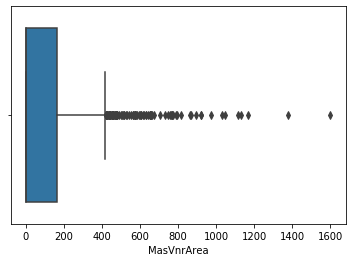

In [23]:
# plotting the MasVnrArea for better understanding. 
sns.boxplot(x = 'MasVnrArea', data = housing_df)
plt.show()

In [24]:
# to check the statistic of MasVnrArea
housing_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [25]:
# Outliers present in the variable so shall impute Nan with meadian . 
housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].median(), inplace = True)
housing_df['MasVnrArea'].value_counts(dropna = False)

0.0      869
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

GarageYrBlt is similar as YearBuilt thus there will be high correaltion betweent the two. Hence we are droping the column. Droping the Month sold as it will not represent in the inferences of the model hence droping the column

In [26]:
# to drop the above mentioned variables. 
housing_df.drop(['GarageYrBlt','MoSold'], axis = 1, inplace = True)
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2).sort_values(ascending = False)

SalePrice       0.0
MasVnrType      0.0
YearBuilt       0.0
YearRemodAdd    0.0
RoofStyle       0.0
               ... 
2ndFlrSF        0.0
1stFlrSF        0.0
CentralAir      0.0
HeatingQC       0.0
Id              0.0
Length: 69, dtype: float64

In [27]:
housing_df.shape

(1460, 69)

No more missing values in the data. So lets proceed further. 

In [28]:
# to drop ID column as its an unique column. 
housing_df.drop('Id', axis = 1, inplace = True)

In [29]:
# Formatting the years to number of years
housing_df['HouseAge']= 2020 - housing_df['YearBuilt']
housing_df['House_RemodelAge']= 2020 - housing_df['YearRemodAdd']

## 2: EDA

Lets try to explore the relationships of various variables with the independent variables. 

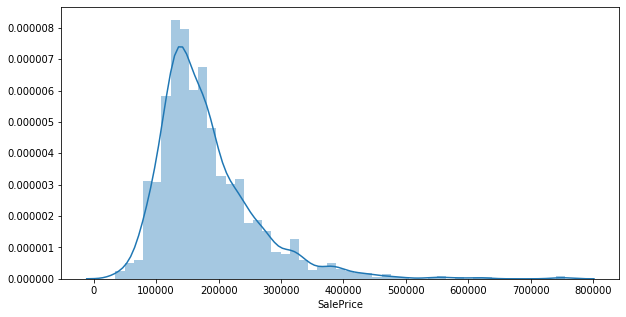

In [30]:
# to check the target variables distribution. 
plt.figure(figsize=(10,5))
sns.distplot(housing_df['SalePrice'])
plt.show()

Here we can see that the target variable is not normally distributed so we need to convert it to log of target variable. 


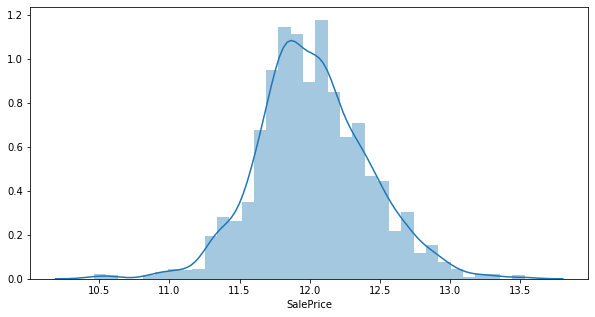

In [31]:
housing_df['SalePrice'] = np.log(housing_df['SalePrice'])

# to plot after making  the change
plt.figure(figsize=(10,5))
sns.distplot(housing_df['SalePrice'])
plt.show()

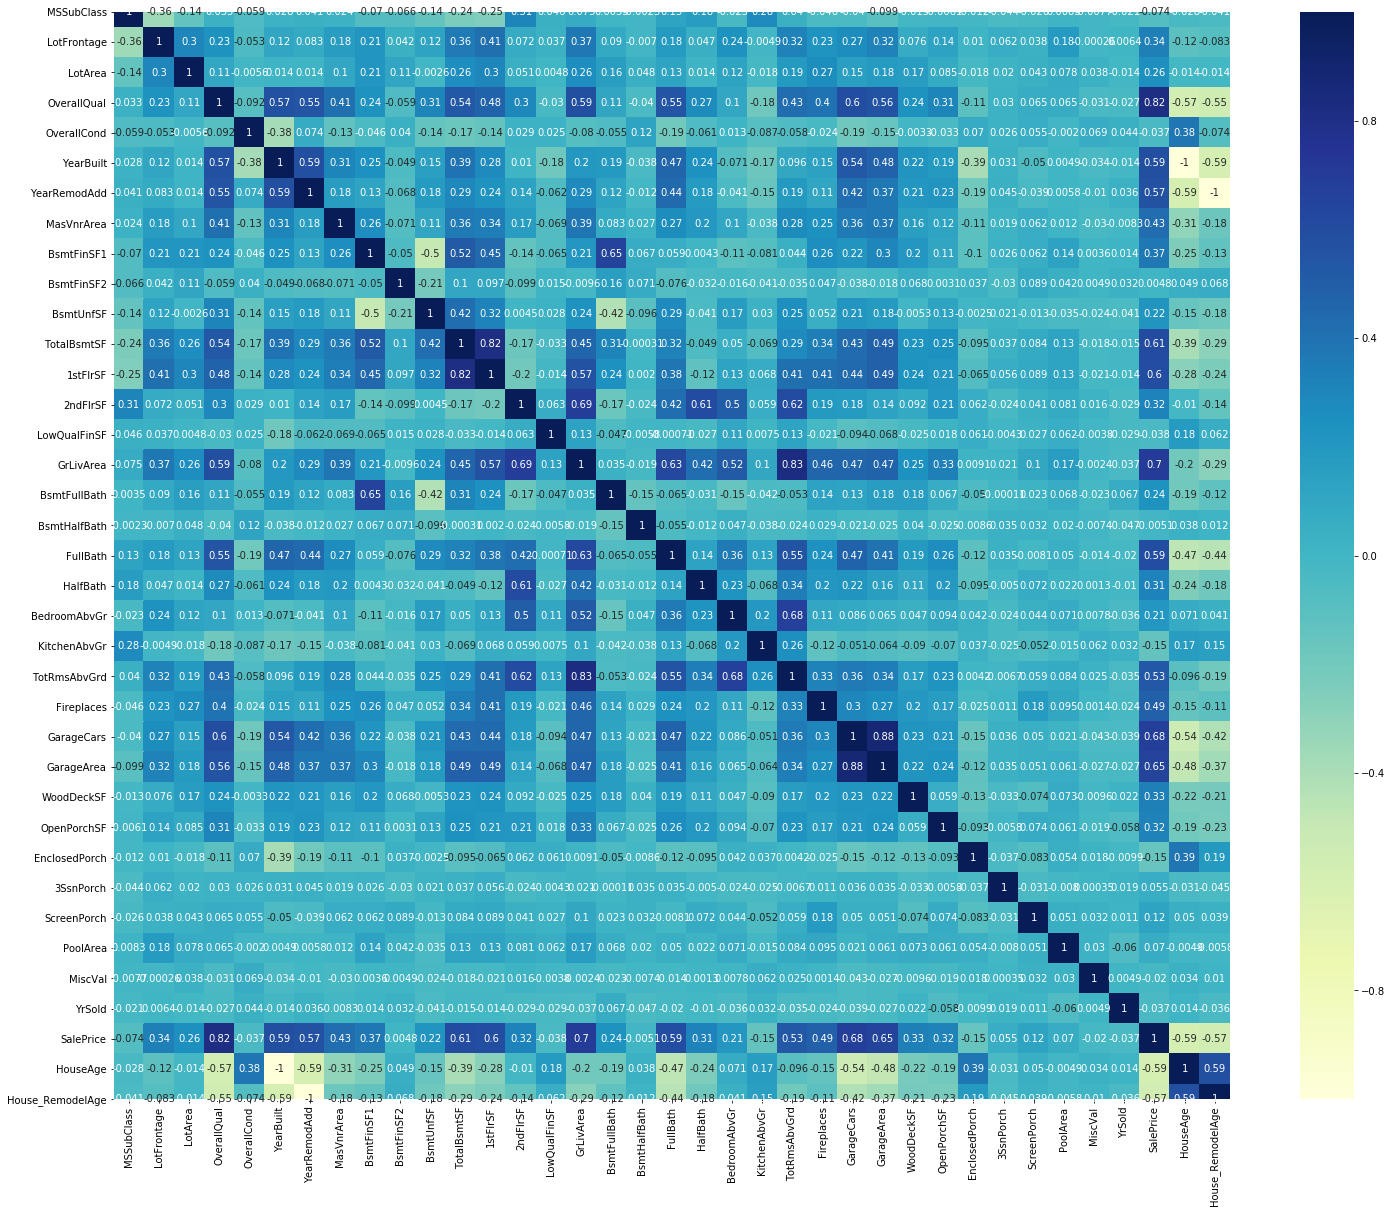

In [32]:
# to check the correlation among variables through heatmap. 
plt.figure(figsize=(25,20))
sns.heatmap(housing_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

From the above correaltion map, we can observe that few columns are having postive correalation with the target variable and few variables are having negative correaltion with the target variable.


Target variable(Sale Price) is positive correlated with:

- OverallQual - Overall Quality of the House
- TotalBasmtSF - Total Basement area in SQFT
- 1stFlrSF  - First Floor Area in SQFT 
- GrLivArea  - Total Area above ground living in SQFT 
- GarageCars  - Size of the Garage(Number of cars)
- GarageArea  - Total area of Garage in SQFT 

Target variable(Sale Price) is negatively correlated with:

- HouseAge  - Age of the property
- House_RemodelAge  - Age of the property after remodelling done

In [33]:
#Dropping columns with skewed data  and highly correlated with other and columns which are not having business impact
housing_df.drop(['MSZoning','Street','LandContour','Utilities','Condition2','Condition1','LandSlope','RoofMatl','ExterCond',
              'Heating','Functional','PavedDrive','BldgType','BsmtHalfBath','KitchenAbvGr','SaleType','SaleCondition','BsmtFinSF1','BsmtUnfSF']
             ,axis=1, inplace=True)

In [34]:
#Extracting numerical / contineous variables for further analysis
num_var= [i for i in housing_df.columns if housing_df.dtypes[i]!='object']
cat_var = [i for i in housing_df.columns if housing_df.dtypes[i] =='object']

In [35]:
cat_var

['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [36]:
num_var

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice',
 'HouseAge',
 'House_RemodelAge']

In [37]:
# to check if any categorical variables have binary values. 
for i in cat_var:
    print(i, housing_df[i].unique(), '\n')

LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 

LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 

Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock'] 

MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn'] 

ExterQual ['Gd' 'TA' 'Ex' 'Fa'] 

Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone'] 

BsmtQual ['Gd' 'TA'

In [38]:
# since CentralAir variable has binary variables lets convert that into binary values. 
housing_df['CentralAir']= housing_df['CentralAir'].replace({'N':0, 'Y':1})

In [39]:
# checking the value counts NeighbourHood
housing_df['Neighborhood'].value_counts(dropna=False)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

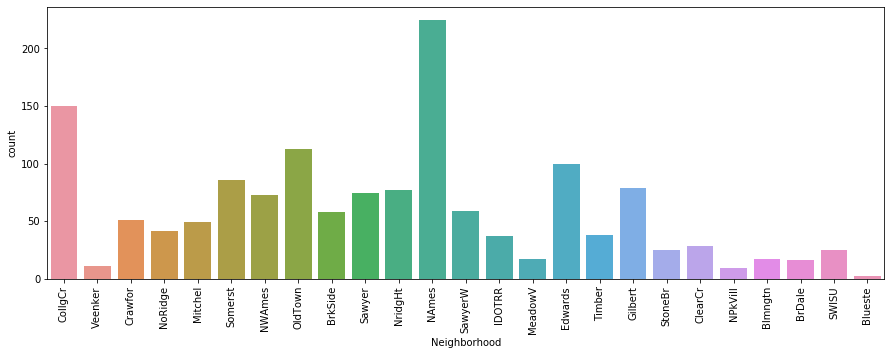

In [40]:
# to plot the Neighborhood for the better visualization
plt.figure(figsize=(15,5))
sns.countplot(housing_df['Neighborhood'])
plt.xticks(rotation  = 90)
plt.show()

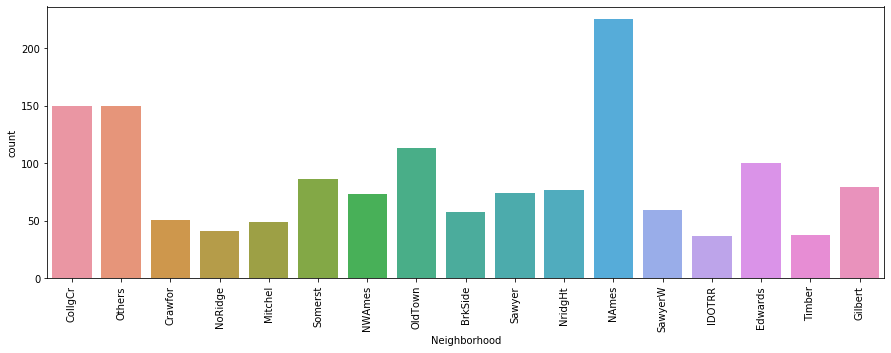

In [41]:
# Lets combine all the small frequency  values into others for better comparison
housing_df['Neighborhood'].replace({'ClearCr':'Others'},inplace=True)
housing_df['Neighborhood'].replace({'StoneBr':'Others'},inplace=True)
housing_df['Neighborhood'].replace({'SWISU':'Others'},inplace=True)
housing_df['Neighborhood'].replace({'MeadowV':'Others'},inplace=True)
housing_df['Neighborhood'].replace({'Blmngtn':'Others'},inplace=True)
housing_df['Neighborhood'].replace({'BrDale':'Others'},inplace=True)
housing_df['Neighborhood'].replace({'Veenker':'Others'},inplace=True)
housing_df['Neighborhood'].replace({'NPkVill':'Others'},inplace=True)
housing_df['Neighborhood'].replace({'Blueste':'Others'},inplace=True)

# to plot the variable after the changes
plt.figure(figsize=(15,5))
sns.countplot(housing_df['Neighborhood'])
plt.xticks(rotation  = 90)
plt.show()

In [42]:
# as per the data dictionary many of the columns are actually categorical which are  numeric in  the  data. 
# so lets change the data type of these variables. 
housing_df['MSSubClass'] = housing_df['MSSubClass'].astype('object')
housing_df['OverallQual'] = housing_df['OverallQual'].astype('object')
housing_df['OverallCond'] = housing_df['OverallCond'].astype('object')
housing_df['BsmtFullBath'] = housing_df['BsmtFullBath'].astype('object')
housing_df['FullBath'] = housing_df['FullBath'].astype('object')
housing_df['HalfBath'] = housing_df['HalfBath'].astype('object')
housing_df['BedroomAbvGr'] = housing_df['BedroomAbvGr'].astype('object')
housing_df['TotRmsAbvGrd'] = housing_df['TotRmsAbvGrd'].astype('object')
housing_df['Fireplaces'] = housing_df['Fireplaces'].astype('object')
housing_df['GarageCars'] = housing_df['GarageCars'].astype('object')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
MSSubClass          1460 non-null object
LotFrontage         1460 non-null float64
LotArea             1460 non-null int64
LotShape            1460 non-null object
LotConfig           1460 non-null object
Neighborhood        1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null object
OverallCond         1460 non-null object
YearBuilt           1460 non-null int64
YearRemodAdd        1460 non-null int64
RoofStyle           1460 non-null object
Exterior1st         1460 non-null object
Exterior2nd         1460 non-null object
MasVnrType          1460 non-null object
MasVnrArea          1460 non-null float64
ExterQual           1460 non-null object
Foundation          1460 non-null object
BsmtQual            1460 non-null object
BsmtExposure        1460 non-null object
BsmtFinSF2          1460 non-null int64
TotalBsmtSF         1460 non-null 

## 3: Data Preparation

In [43]:
# Creating Dummy variables for categorical variables
cat_var_df = housing_df.select_dtypes(include=['object'])
# converting categorical variables in dummy variables
cat_dummies = pd.get_dummies(cat_var_df, drop_first=True)
#reading the top 5 rows
cat_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
#to concat the original dataframe with the dummy variable dataframe
housing_df = pd.concat([housing_df, cat_dummies], axis=1)
housing_df.shape

(1460, 219)

In [45]:
# Dropping the original categorical columns.
housing_df.drop(['MSSubClass','LotShape','LotConfig','Neighborhood','HouseStyle','OverallQual','OverallCond','RoofStyle',
              'Exterior1st','Exterior2nd','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','HeatingQC',
              'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces',
              'FireplaceQu','GarageType','GarageFinish','GarageCars'],axis=1,inplace=True)
housing_df.shape

(1460, 192)

In [46]:
#  creating dummies for continous variables. 
num_var_df = housing_df.select_dtypes(include=['int64','float64'])
num_var_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,HouseAge,House_RemodelAge
0,65.0,8450,2003,2003,196.0,0,856,1,856,854,...,61,0,0,0,0,0,2008,12.247694,17,17
1,80.0,9600,1976,1976,0.0,0,1262,1,1262,0,...,0,0,0,0,0,0,2007,12.109011,44,44
2,68.0,11250,2001,2002,162.0,0,920,1,920,866,...,42,0,0,0,0,0,2008,12.317167,19,18
3,60.0,9550,1915,1970,0.0,0,756,1,961,756,...,35,272,0,0,0,0,2006,11.849398,105,50
4,84.0,14260,2000,2000,350.0,0,1145,1,1145,1053,...,84,0,0,0,0,0,2008,12.429216,20,20


In [47]:
# to check the different percentile of the numeric columns 
num_var_df.describe(percentiles=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.9,0.95,0.99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,HouseAge,House_RemodelAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,46.549315,1057.429452,0.934932,1162.626712,346.992466,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,12.024051,48.732192,35.134247
std,22.027677,9981.264932,30.202904,20.645407,180.731373,161.319273,438.705324,0.246731,386.587738,436.528436,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,0.399452,30.202904,20.645407
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,10.460242,10.000000,10.000000
5%,35.950000,3311.700000,1916.000000,1950.000000,0.000000,0.000000,519.300000,0.000000,672.950000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,11.385092,13.000000,13.000000
10%,49.000000,5000.000000,1924.900000,1950.000000,0.000000,0.000000,636.900000,1.000000,756.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,11.575665,14.000000,14.000000
20%,59.000000,7078.400000,1947.800000,1961.800000,0.000000,0.000000,755.800000,1.000000,848.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,11.728037,17.000000,15.000000
30%,60.000000,8063.700000,1958.000000,1971.000000,0.000000,0.000000,840.000000,1.000000,915.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,11.816727,22.700000,18.000000
40%,68.000000,8793.400000,1965.000000,1980.000000,0.000000,0.000000,910.000000,1.000000,1000.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,11.898188,36.000000,22.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,0.000000,991.500000,1.000000,1087.000000,0.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,12.001505,47.000000,26.000000


Many variables from above we can see that are having zero values which in turn wouldnt add much value to the data, hence decided to drop these variables. 


In [48]:
# to drop the variabes having zero value in them . 
housing_df.drop(['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'], axis =1,
               inplace = True)
housing_df.shape

(1460, 185)

In [49]:
#Extracting numerical / contineous variables for further analysis
num_var= [i for i in housing_df.columns if housing_df.dtypes[i]!='object']
cat_var = [i for i in housing_df.columns if housing_df.dtypes[i] =='object']
num_var

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'YrSold',
 'SalePrice',
 'HouseAge',
 'House_RemodelAge',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Others',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somer

In [50]:
# splitting  the data into test and train data. 
housing_df_train, housing_df_test = train_test_split(housing_df, train_size = 0.7, random_state = 100)

In [51]:
# Scaling the continuous variables.
scaler = StandardScaler()
scaled_vars = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'CentralAir',
               '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 
               'HouseAge', 'House_RemodelAge']
housing_df_train[scaled_vars] = scaler.fit_transform(housing_df_train[scaled_vars])
housing_df_test[scaled_vars] = scaler.fit_transform(housing_df_test[scaled_vars])

In [52]:
# putting the feature variable to  X
X_train = housing_df_train
y_train = housing_df_train.pop('SalePrice')

In [53]:
y_test = housing_df_test.pop('SalePrice')
X_test = housing_df_test

## 4: Modelling.

### Ridge Regression

Now we perform Ridge Regression with the help of Negative mean absolute error. 

In [54]:
# To create a list of alpha values to perform the regression. 
params = {'alpha':[0.01,0.1,1,10,20,50,75,100]}
ridge = Ridge()

# cross validation 
folds   = 10

# creatig cross validation  model using r2 score. 
cv_model = GridSearchCV(estimator=ridge, param_grid=params, scoring = 'r2', cv = folds, return_train_score=True, verbose=1) 

cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 20, 50, 75, 100]},
             return_train_score=True, scoring='r2', verbose=1)

In [55]:
# to create the  CV model results into a DataFrame
cv_model_df = pd.DataFrame(cv_model.cv_results_)
cv_model_df['param_alpha'] = cv_model_df['param_alpha'].astype('float32')

# to read the 5 rows of the cv model df
cv_model_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005709,0.000899,0.002499,0.000502,0.01,{'alpha': 0.01},0.880681,0.843025,0.904589,0.603626,...,0.923698,0.935544,0.926652,0.931991,0.925011,0.923933,0.920694,0.926695,0.926610,0.004055
1,0.005493,0.000661,0.002503,0.000497,0.10,{'alpha': 0.1},0.881634,0.847787,0.905024,0.605732,...,0.923548,0.935396,0.926487,0.931879,0.924844,0.923698,0.920551,0.926539,0.926451,0.004064
2,0.005406,0.000485,0.002500,0.000501,1.00,{'alpha': 1},0.888772,0.864868,0.907122,0.610182,...,0.921321,0.933278,0.924163,0.929525,0.922507,0.921469,0.918027,0.923525,0.924065,0.004120
3,0.005511,0.000657,0.002199,0.000401,10.00,{'alpha': 10},0.903095,0.883401,0.914527,0.599481,...,0.907885,0.922079,0.913276,0.915782,0.909620,0.909576,0.904170,0.909338,0.911104,0.004672
4,0.005100,0.000300,0.002199,0.000400,20.00,{'alpha': 20},0.904010,0.884473,0.914486,0.581003,...,0.898272,0.914684,0.904755,0.906798,0.900283,0.900630,0.894523,0.899733,0.901998,0.005288


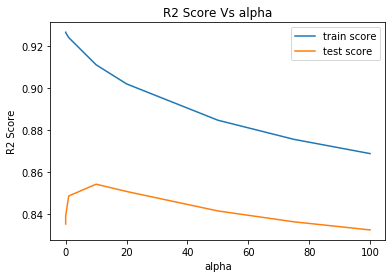

In [56]:
# plotting test and train scoes with alpha and r2 score
cv_model_df['param_alpha'] = cv_model_df['param_alpha'].astype('int32')

# plotting between the alpha and R2 Score for train and test sets
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score Vs alpha")
plt.plot(cv_model_df['param_alpha'], cv_model_df['mean_train_score'])
plt.plot(cv_model_df['param_alpha'], cv_model_df['mean_test_score'])
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [57]:
# Finding out the best score and Optimum value of alpha
print(cv_model.best_estimator_)
print('Best alpha value:',cv_model.best_params_)
print('Best score:',cv_model.best_score_)

Ridge(alpha=10)
Best alpha value: {'alpha': 10}
Best score: 0.8541993272501823



From the above,the alpha value is 10 from the both r2 score and negative mean absolute error. Hence we are considering alpha value =10 for the Ridge regression.

alpha = 10

In [58]:
# ridge regression model with alpha 10

ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)
# r2 score for train set
y_pred_train = ridge.predict(X_train)
print('r2 Score for Train is ',r2_score(y_train,y_pred_train))
#r2 score for test set
y_pred_test = ridge.predict(X_test)
print('r2 Score for test is ',r2_score(y_test,y_pred_test))

r2 Score for Train is  0.9096804803315914
r2 Score for test is  0.8660914389823356


In [59]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = housing_df.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Features','Coefficient']

In [60]:
#selecting the top 10 variables
ridge_coef[:10].sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
9,GrLivArea,0.147724
0,LotFrontage,0.091727
8,2ndFlrSF,0.073740
3,YearRemodAdd,0.069124
7,1stFlrSF,0.061069
6,CentralAir,0.058608
2,YearBuilt,0.050184
4,MasVnrArea,0.042278
5,TotalBsmtSF,0.009447
1,LotArea,-0.010729


In [61]:
ridge_rmse = Ridge(alpha=10)
ridge_rmse.fit(X_train,y_train)
#mean squared error for train
y_pred_train_mean = ridge_rmse.predict(X_train)
print('Mean squared error for train is ',np.sqrt(mean_squared_error(y_train, y_pred_train_mean)))
# mean squared error for test
y_pred_test_mean = ridge_rmse.predict(X_test)
print('Mean squared error for test is ', np.sqrt(mean_squared_error(y_test, y_pred_test_mean)))

Mean squared error for train is  0.30053206096589513
Mean squared error for test is  0.36593518690837096


<br>

### Lasso  Rregressionn


We shall proceed now with Lasso Regression  using Negative Mean Absolute Error

In [62]:
lasso = Lasso()

# to create a list of alpha
params  = {'alpha':[0.0001,  0.001,  0.002,  0.005, 0.01]}

#cross validation
folds = 10

# cv model
cv_model_lasso = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv = folds,
                             verbose = 1, return_train_score=True)

cv_model_lasso.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.6s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# to create a df from the results . 
cv_model_lasso_df = pd.DataFrame(cv_model_lasso.cv_results_)
# to read the df
cv_model_lasso_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.060200,0.008931,0.002400,0.000490,0.0001,{'alpha': 0.0001},-0.238143,-0.258199,-0.237195,-0.260891,...,-0.198680,-0.184489,-0.195932,-0.189231,-0.198215,-0.200599,-0.201259,-0.194969,-0.196202,0.005127
1,0.030101,0.004884,0.002795,0.000399,0.001,{'alpha': 0.001},-0.223789,-0.237680,-0.230011,-0.256868,...,-0.205765,-0.191855,-0.202556,-0.195628,-0.203660,-0.204345,-0.207093,-0.202099,-0.202473,0.004692
2,0.025400,0.003073,0.002606,0.000483,0.002,{'alpha': 0.002},-0.218401,-0.233630,-0.229774,-0.261807,...,-0.212654,-0.200625,-0.207661,-0.205278,-0.211025,-0.210904,-0.214558,-0.209431,-0.209936,0.004145
3,0.013300,0.001847,0.002399,0.000490,0.005,{'alpha': 0.005},-0.224437,-0.227313,-0.223467,-0.282505,...,-0.231062,-0.220556,-0.228411,-0.225652,-0.230099,-0.228925,-0.235694,-0.230296,-0.229576,0.003980
4,0.008897,0.000694,0.002298,0.000629,0.01,{'alpha': 0.01},-0.244624,-0.233196,-0.230607,-0.323282,...,-0.260512,-0.247329,-0.251999,-0.250793,-0.255132,-0.257818,-0.259621,-0.258994,-0.255716,0.004124


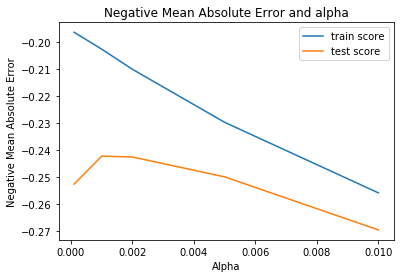

In [64]:
# plotting mean test and train scores with alpha. 
cv_model_lasso_df['param_alpha']= cv_model_lasso_df['param_alpha'].astype('float32')

# plotting between neg mean absolute error  and alpha. 
plt.plot(cv_model_lasso_df['param_alpha'], cv_model_lasso_df['mean_train_score'])
plt.plot(cv_model_lasso_df['param_alpha'], cv_model_lasso_df['mean_test_score'])
plt.xlabel("Alpha")
plt.ylabel("Negative Mean Absolute Error")
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(["train score", 'test score'], loc = 'upper right')
plt.show()

In [65]:
# finding out the best score and optimum value of alpha.
print(cv_model_lasso.best_estimator_)
print('Best alpha value:',cv_model_lasso.best_params_)
print('Best score:',cv_model_lasso.best_score_)

Lasso(alpha=0.001)
Best alpha value: {'alpha': 0.001}
Best score: -0.24211082925930622


### Lasso Regression using R2 Score

Now we will perform the Lasso Regression using R2 Score

In [66]:
# list of alphas to tune the model
params = {'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01]}
lasso = Lasso()
# cross validation
folds=10
cv_model_lasso_r2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

cv_model_lasso_r2.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.6s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [67]:
#Creating the results dataframe.
cv_model_lasso_r2_results = pd.DataFrame(cv_model_lasso_r2.cv_results_)
#reading the top 5 rows
cv_model_lasso_r2_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.061713,0.009067,0.002486,0.000498,0.0001,{'alpha': 0.0001},0.885452,0.851005,0.906892,0.604461,...,0.922947,0.934652,0.925736,0.931248,0.924167,0.922923,0.919888,0.925897,0.925779,0.004049
1,0.028198,0.004258,0.002300,0.000458,0.001,{'alpha': 0.001},0.894012,0.873540,0.913343,0.592281,...,0.913305,0.925332,0.916542,0.922376,0.915077,0.914606,0.909774,0.915933,0.916432,0.004201
2,0.026602,0.003665,0.002494,0.000498,0.002,{'alpha': 0.002},0.894412,0.882394,0.912937,0.577209,...,0.901582,0.916086,0.906838,0.910997,0.903489,0.903726,0.897555,0.903339,0.905189,0.004884
3,0.014100,0.003015,0.002800,0.000400,0.005,{'alpha': 0.005},0.892034,0.886946,0.912366,0.533002,...,0.875037,0.895825,0.879464,0.883804,0.876134,0.877766,0.868478,0.874744,0.878399,0.006871
4,0.009295,0.001419,0.003006,0.000891,0.01,{'alpha': 0.01},0.884592,0.876571,0.899596,0.463609,...,0.842604,0.870467,0.854513,0.855422,0.848160,0.846712,0.839557,0.844140,0.849425,0.008400


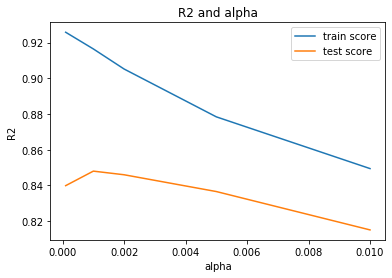

In [68]:
# plotting mean test and train scoes with alpha 
cv_model_lasso_r2_results['param_alpha'] = cv_model_lasso_r2_results['param_alpha'].astype('float32')

# plotting between R2Score and alpha
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.plot(cv_model_lasso_r2_results['param_alpha'], cv_model_lasso_r2_results['mean_train_score'])
plt.plot(cv_model_lasso_r2_results['param_alpha'], cv_model_lasso_r2_results['mean_test_score'])
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [69]:
# finding out the best score and optimum value of alpha.
print(cv_model_lasso_r2.best_estimator_)
print('Best alpha value:',cv_model_lasso_r2.best_params_)
print('Best score:',cv_model_lasso_r2.best_score_)

Lasso(alpha=0.001)
Best alpha value: {'alpha': 0.001}
Best score: 0.8479984610103143


From the above,the alpha value is 10 from the both r2 score and negative mean absolute error. Hence we are considering alpha value =0.001 for the lasso regression.

alpha = 0.001

In [70]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('r2 Score for Train is ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('r2 Score for Test is ',r2_score(y_true=y_test,y_pred=y_test_pred))

r2 Score for Train is  0.9134974323693212
r2 Score for Test is  0.8675326167910746


In [71]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = housing_df.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficient']

In [72]:
#coefficients 
lasso.coef_

array([-0.01431685,  0.04646176,  0.131012  ,  0.07831879,  0.0063069 ,
        0.05471866,  0.05267936,  0.04900168,  0.12310673,  0.19530442,
        0.0462622 ,  0.02804732,  0.00329926, -0.00970021, -0.00768063,
       -0.00107427, -0.20862903, -0.        ,  0.        , -0.        ,
       -0.07933452,  0.05343785,  0.        ,  0.        , -0.        ,
       -0.02047434, -0.11732055, -0.41550757, -0.34284604, -0.        ,
        0.04792206, -0.09774642,  0.00716869,  0.09472826, -0.03316641,
       -0.        ,  0.        ,  0.00522227,  0.30602879, -0.18394444,
       -0.        , -0.27071841, -0.01707177, -0.        , -0.00849395,
        0.15664218,  0.26764374, -0.18755502,  0.05082187, -0.08581978,
        0.        ,  0.26219405, -0.        ,  0.00808461,  0.0732087 ,
       -0.        ,  0.        , -0.06478889, -0.        ,  0.        ,
       -0.58267387, -0.10920337, -0.12526722, -0.06450211,  0.        ,
        0.13499912,  0.31857262,  0.56331774,  0.04559978, -0.  

In [73]:
lasso_coef[:10].sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
3,YearRemodAdd,0.131012
9,GrLivArea,0.123107
4,MasVnrArea,0.078319
6,CentralAir,0.054719
7,1stFlrSF,0.052679
8,2ndFlrSF,0.049002
2,YearBuilt,0.046462
0,LotFrontage,0.032802
5,TotalBsmtSF,0.006307
1,LotArea,-0.014317


In [74]:
lasso_rmse = Lasso(alpha=0.001)
lasso_rmse.fit(X_train,y_train)

y_pred_train = lasso_rmse.predict(X_train)
print('Mean Squared error for Train is ',np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lasso_rmse.predict(X_test)
print('Mean Squared error for Test is ',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Mean Squared error for Train is  0.29411318846777135
Mean Squared error for Test is  0.363960689098322


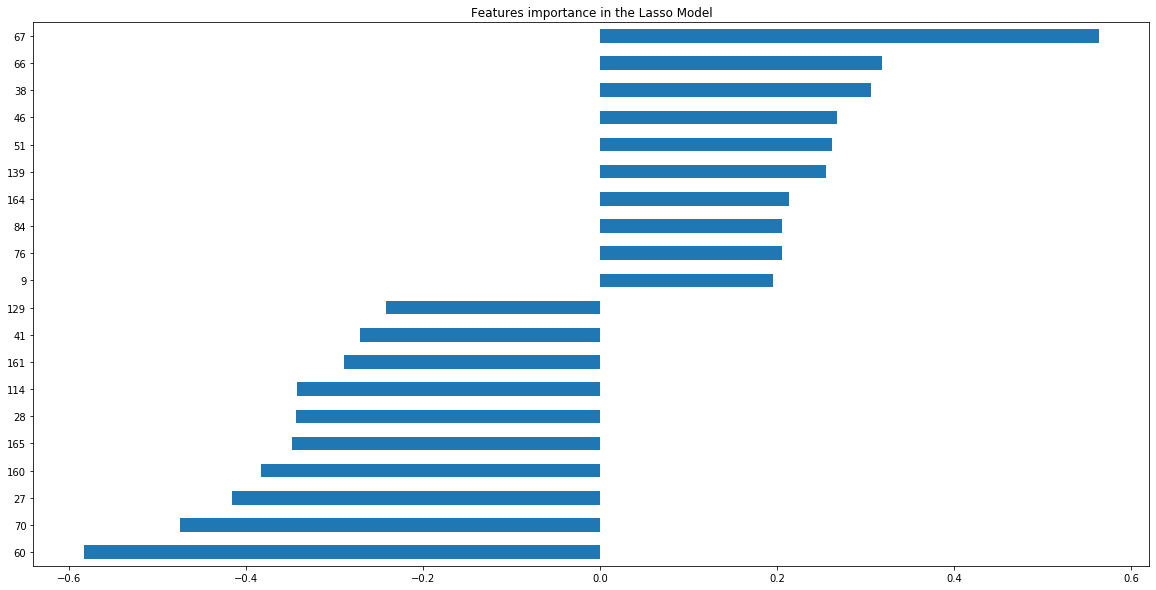

In [75]:
plt.figure(figsize=(20, 10))
coefs = pd.Series(lasso.coef_)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Features importance in the Lasso Model")
plt.show()

<br>

## Subjective Questions:

#### Question 1	<br>
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

As per the model created above the the optimal value of alpha that we got are as follows:<br>
#####  Ridge Alpha : 10
##### Lasso Alpha : 0.001

<br>
If we double the alpha values for both Ridge and Lasso, we can see the following changes. <br>
Changed Ridge Alpha : 20 <br>
Changed Lasso Alpha : 0.002

Let us rebuild the model with the changed alpha. 


In [76]:
# ridge regression model with alpha 20

new_ridge = Ridge(alpha=20)
new_ridge.fit(X_train,y_train)
# r2 score for train set
y_pred_train = new_ridge.predict(X_train
print('r2 Score for Train is ',r2_score(y_train,y_pred_train))
#r2 score for test set
y_pred_test = new_ridge.predict(X_test)
print('r2 Score for test is ',r2_score(y_test,y_pred_test))

r2 Score for Train is  0.9012229283354803
r2 Score for test is  0.8632344435896998


In [78]:
#creating coeffcients for the ridge regression
new_model_parameter = list(new_ridge.coef_)
new_model_parameter.insert(0,new_ridge.intercept_)
cols = housing_df.columns
cols.insert(0,'const')
new_ridge_coef = pd.DataFrame(list(zip(cols,new_model_parameter)))
new_ridge_coef.columns = ['Features','Coefficient']

In [83]:
#selecting the top 10 variables
print(new_ridge_coef[:10].sort_values(by='Coefficient',ascending=False))

       Features  Coefficient
9     GrLivArea     0.135826
0   LotFrontage     0.104112
8      2ndFlrSF     0.077311
3  YearRemodAdd     0.069702
6    CentralAir     0.068973
7      1stFlrSF     0.068100
2     YearBuilt     0.050753
4    MasVnrArea     0.046765
5   TotalBsmtSF     0.012624
1       LotArea    -0.010894


In [80]:
#rebuilding lasso regression model with alpha 0.002
lasso_new = Lasso(alpha=0.002)
lasso_new.fit(X_train,y_train)
y_train_pred_new1 = lasso_new.predict(X_train)
y_test_pred_new1 = lasso_new.predict(X_test)
print('r2 Score for Train set',r2_score(y_true=y_train,y_pred=y_train_pred_new1))
print('r2 score for Test set',r2_score(y_true=y_test,y_pred=y_test_pred_new1))

r2 Score for Train set 0.90234690911789
r2 score for Test set 0.8682349214725892


In [82]:

model_lasso_new = list(lasso_new.coef_)
model_lasso_new.insert(0,lasso_new.intercept_)
cols = housing_df.columns
cols.insert(0,'const')
lasso_coef_new = pd.DataFrame(list(zip(cols,model_lasso_new)))
lasso_coef_new.columns = ['Features','Coefficient']
lasso_coef_new[:10].sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
3,YearRemodAdd,0.121152
4,MasVnrArea,0.091519
6,CentralAir,0.074965
7,1stFlrSF,0.061901
9,GrLivArea,0.059103
2,YearBuilt,0.045717
8,2ndFlrSF,0.011501
5,TotalBsmtSF,0.009684
1,LotArea,-0.014352
0,LotFrontage,-0.046562


#### Question 2:<br>
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

As per my model the optimal value of lambda for Ridge and Lasso Regression are:<br>
Ridge – 10 <br>
Lasso – 0.001 <br>
I shall choose Lasso lambda value to apply for value for the following reasons:
- The most important advantage of using the Lasso Regression instead of the Ridge regression is that Lasso Regression trims down the coefficients of redundant variables to zero, which in turn performs Feature selection whereas Ridge just reduces the coefficients value to a very low value and not zero. 
-	In our current data, we have more than 190 features and since we want to pick up only those features which the most useful here Lasso Regression is helpful as it produces sparse solutions. 
-	Lasso Regression also helps to determine the features which have a direct impact to the target variable.


In [84]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = housing_df.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficient']

In [85]:
lasso_coef[:10].sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
3,YearRemodAdd,0.131012
9,GrLivArea,0.123107
4,MasVnrArea,0.078319
6,CentralAir,0.054719
7,1stFlrSF,0.052679
8,2ndFlrSF,0.049002
2,YearBuilt,0.046462
0,LotFrontage,0.032802
5,TotalBsmtSF,0.006307
1,LotArea,-0.014317


<br>

#### Question 3:
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [87]:
# to delete the top 5 features of lasso method. 
# create a new dataframe with the remaining features. 
new_housing_df = housing_df.drop(['YearRemodAdd','GrLivArea','MasVnrArea','CentralAir','1stFlrSF'],  axis = 1)
new_housing_df.head()

,LotFrontage,LotArea,YearBuilt,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,...,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
0,65.0,8450,2003,856,854,548,0,61,2008,12.247694,...,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,1976,1262,0,460,298,0,2007,12.109011,...,0,0,0,0,1,0,0,1,0,0
2,68.0,11250,2001,920,866,608,0,42,2008,12.317167,...,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,1915,756,756,642,0,35,2006,11.849398,...,0,1,0,0,0,1,0,0,1,0
4,84.0,14260,2000,1145,1053,836,192,84,2008,12.429216,...,0,0,0,0,1,0,0,0,1,0


In [88]:
# to check the shape of the new data frame
new_housing_df.shape

(1460, 180)

In [89]:
# to split the new dataframe into train and test, 
new_housing_df_train, new_housing_df_test = train_test_split(new_housing_df, train_size= 0.7, random_state = 100)
print(new_housing_df_train.shape)
print(new_housing_df_test.shape)

(1021, 180)
(439, 180)


In [90]:
# scaling the continous variables. 
scaler = StandardScaler()
scale_vars = ['LotFrontage', 'LotArea', 'YearBuilt', 'TotalBsmtSF',
              '2ndFlrSF',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 'HouseAge', 'House_RemodelAge']

new_housing_df_train[scale_vars]= scaler.fit_transform(new_housing_df_train[scale_vars])
new_housing_df_test[scale_vars]= scaler.fit_transform(new_housing_df_test[scale_vars])

In [91]:
y_train_new = new_housing_df_train.pop('SalePrice')
X_train_new = new_housing_df_train

In [92]:
y_test_new = new_housing_df_test.pop('SalePrice')
X_test_new = new_housing_df_test

From the question we can understand that we need to find top 5 important variables, hence we shall proceed with Lasso Regression Technique. 


### Lasso Regression - Modified. 


In [93]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 10
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train_new)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished


GridSearchCV(cv=10, estimator=Lasso(alpha=0.001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.061200,0.007012,0.002715,0.000783,0.0001,{'alpha': 0.0001},-0.248844,-0.267139,-0.247331,-0.270725,...,-0.205350,-0.192843,-0.202144,-0.199039,-0.204953,-0.207280,-0.208586,-0.202581,-0.203519,0.004437
1,0.013202,0.002444,0.002103,0.000298,0.001,{'alpha': 0.001},-0.228630,-0.245051,-0.244769,-0.267880,...,-0.213175,-0.202574,-0.211495,-0.206371,-0.212665,-0.212990,-0.215530,-0.209861,-0.211305,0.003824
2,0.006697,0.000637,0.002200,0.000404,0.01,{'alpha': 0.01},-0.261301,-0.248085,-0.249961,-0.338782,...,-0.274923,-0.262883,-0.266460,-0.267683,-0.270598,-0.270771,-0.272624,-0.271611,-0.270042,0.003280


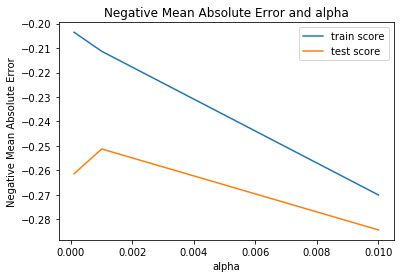

In [95]:
# plotting mean test and train scores with alpha 
lasso_cv_modified_results['param_alpha'] = lasso_cv_modified_results['param_alpha'].astype('float32')
# plotting between the negative mean absolute error and alpha
plt.plot(lasso_cv_modified_results['param_alpha'], lasso_cv_modified_results['mean_train_score'])
plt.plot(lasso_cv_modified_results['param_alpha'], lasso_cv_modified_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

In [96]:
# Printing the best score and optimum value of alpha.
print(lasso_cv_model_modified.best_estimator_)
print('Best alpha value:',lasso_cv_model_modified.best_params_)
print('Best score:',lasso_cv_model_modified.best_score_)

Lasso(alpha=0.001)
Best alpha value: {'alpha': 0.001}
Best score: -0.2512423339265606


In [97]:
lasso_new_modified = Lasso(alpha=0.001)
lasso_new_modified.fit(X_train_new,y_train_new)

y_train_new_pred = lasso_new_modified.predict(X_train_new)
y_test_new_pred = lasso_new_modified.predict(X_test_new)

print('r2 Score for Train:',r2_score(y_true=y_train_new,y_pred=y_train_new_pred))
print('r2 Score for Test:',r2_score(y_true=y_test_new,y_pred=y_test_new_pred))

r2 Score for Train: 0.9091718231774004
r2 Score for Test: 0.8616221073272513


In [99]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = new_housing_df.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficient']

In [100]:
lasso_coef[:10].sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
3,TotalBsmtSF,0.131012
9,SalePrice,0.123107
4,2ndFlrSF,0.078319
6,WoodDeckSF,0.054719
7,OpenPorchSF,0.052679
8,YrSold,0.049002
2,YearBuilt,0.046462
0,LotFrontage,0.032802
5,GarageArea,0.006307
1,LotArea,-0.014317
